In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = 5

In [4]:
def inner_product(v, H):
   return v @ H @ v

In [48]:
# Algorithm 2: Sampling from posterior with asynchronous updates for linear bandits

X = np.random.random((100, d))  # Finite set of arms

theta = np.zeros(d)
V = np.identity(d)
S = np.zeros(d)
theta_star = np.random.multivariate_normal(np.zeros(d), np.identity(d))
x_star = max(X, key=lambda x: x @ theta_star)
# norms = []
# lhs = []
thetas = []


def in_Theta(x, theta):
    # Return True if \theta in \Theta_x
    argmax_x = max(X, key=lambda x : x @ theta)
    return np.array_equal(x, argmax_x)


def pi(theta, V, x_star):
    # 
    count = 0
    for _ in range(10000):
        random_theta = np.random.multivariate_normal(theta, V)
        count += in_Theta(x_star, random_theta)
    return count / 10000


def delta(x, x_star):
    return x_star @ theta_star - x @ theta_star


def A(lambda_):
    sum = np.zeros((d,d))
    for i in range(len(X)):
        sum += lambda_[i] * np.outer(X[i], X[i])
    return sum


for n in range(1000):

    theta_1 = np.random.multivariate_normal(theta, V)
    x_1 = max(X, key=lambda x: x @ theta_1)

    while True:
        theta_2 = np.random.multivariate_normal(theta, V)
        x_2 = max(X, key=lambda x: x @ theta_2)
        if not np.array_equal(x_1, x_2):
            break

    x_n = min(X, key=lambda x: n * inner_product(x_1 - x_2, np.linalg.inv(V + np.outer(x, x))))
    y_n = theta_star @ x_n + np.random.normal(0, 1)

    V += np.outer(x_n, x_n)
    S += x_n * y_n
    theta = np.linalg.inv(V) @ S

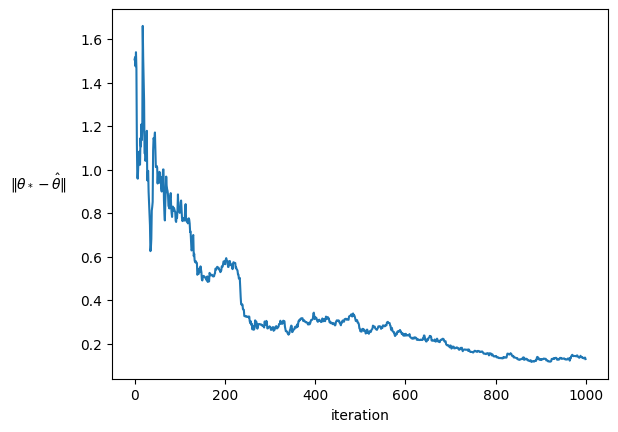

In [55]:
plt.xlabel('iteration')
plt.ylabel(r'$\|\theta_*-\hat{\theta}\|$', rotation=0, labelpad=30)
plt.plot([np.linalg.norm(theta - theta_star) for theta in thetas]);